# Special Pythagorean Triplet
A Pythagorean triplet is a set of three natural numbers, $a<b<c$, for which,

$$ a^2 + b^2 = c^2$$

There exists exactly one Pythagorean triplet for which $a+b+c=1000$. Find the product $abc$

## Solution One - Brute Force
One simple way to solve this problem is to try every possible product in the series

In [2]:
from functools import reduce
from typing import Tuple

from utils.timing import timed


@timed(10)
def solution_one(n: int = 13, series: Tuple[int] = SERIES) -> int:
    """
    finds the maximum n-sized product in the provided series
    
    :param n: size of the product
    :param series: series of numbers
    """
    answer: int = 0

    for start in range(len(series) - n):
        product: int = reduce(lambda a, b: a * b, series[start:start + n])
        answer = product if product > answer else answer

    return answer
    

answer, time = solution_one()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 23514624000
that took: 0.00165152620011213s


### Solution One Discussion
Solution is already not that bad, we iterate through all the numbers in the series from $0$ to $\text{series size} - \text{product size}$ once, multiplying 13 numbers each time. However, it seems kind of wastefull to not use previous results since for each step only one number changes.

## Solution Two - Using Previous Products and Skipping Zeros
To avoid having to re-multiply similar numbers, we can store previous results and use them to generate the next one. Moreover, once we find a zero, we can skip it since all multiplications that include is would also result in zero.

In [3]:
from typing import Tuple, Union

from utils.timing import timed


@timed(10)
def solution_two(n: int = 13, series: Tuple[int] = SERIES) -> int:
    """
    finds the maximum n-sized product in the provided series
    
    :param n: size of the product
    :param series: series of numbers
    """
    answer: int = 0
    start: int = 0
    previous_product: Union[int, None] = None

    while start < len(series) - n:

        # == use previous product == #
        
        if previous_product:    
            previous_product //= series[start - 1]     # divide by previous start
            previous_product *= series[start + n - 1]  # multiply by new number

            if not series[start + n - 1]:   # skip zero
                previous_product = None
                start = start + n - 1

        # == generate fresh product == #

        else:
            previous_product: int = 1

            for i in range(n):
                previous_product *= series[start + i]

                if not series[start + i]:   # skip zero
                    previous_product = None
                    start = start + i
                    break

        answer = previous_product if previous_product and previous_product > answer else answer

        start += 1
    
    return answer

answer, time = solution_two()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 23514624000
that took: 0.00032049970004663917s


### Solution Two Discussion
Solution two is a very good step up from solution one: not only does it not waste time re-multiplying numbers but also skips over zeros which for larger product sequence sizes speeds things up quite a bit.

## Plots

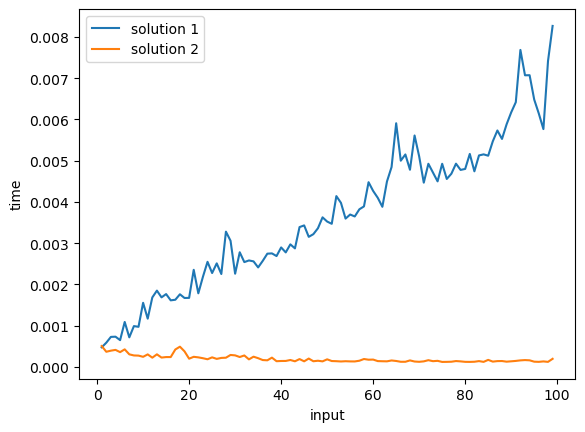

In [4]:
from utils.plotting import plot_range

params = tuple((i, SERIES) for i in range(1, 100))
plot_range(params, (solution_one, solution_two))